# Prophet v Neural Prophet

Comparing the two on a simple dataset with revenue and date, so not adding any further variables for the Neural Prophet model.

## Dependencies

In [25]:
# essentials
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from utils import create_session, mape

import warnings

# Ignore only DeprecationWarnings
warnings.filterwarnings('ignore')

# model
from prophet import Prophet
from neuralprophet import NeuralProphet
from prophet.diagnostics import cross_validation

## Cutoff dataset
This is data without a significant changepoint

### Data Setup

Doing a train / test split for the comparison

In [5]:
session = create_session()

df = session.table("company_revenue_time_series_1") #with cutoff
df = df.to_pandas()

df = df.rename(columns={'DATE': 'ds', 'REVENUE': 'y'})
df = df[['ds', 'y']] # drop everything but these two if there are any

df['ds'] = pd.to_datetime(df['ds'])
df = df.sort_values(by='ds')
df = df.reset_index(drop=True)

print(df.head())
print(df.info())

# z-score = 2
mean = df['y'].mean()
std = df['y'].std()

z_scores = (df['y'] - mean) / std

threshold = 2
outlier_index = np.where(np.abs(z_scores) > threshold)[0]
print("Dropping "+str(len(outlier_index)) + " rows.")
df.drop(index=outlier_index,inplace=True)

cutoff = round(len(df)*0.8)
train = df[:cutoff]
test = df[cutoff:]


          ds          y
0 2012-03-02  137233.99
1 2012-03-03  190247.55
2 2012-03-04  197809.12
3 2012-03-05  125417.64
4 2012-03-06  120953.92
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      364 non-null    datetime64[ns]
 1   y       364 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.8 KB
None
Dropping 12 rows.


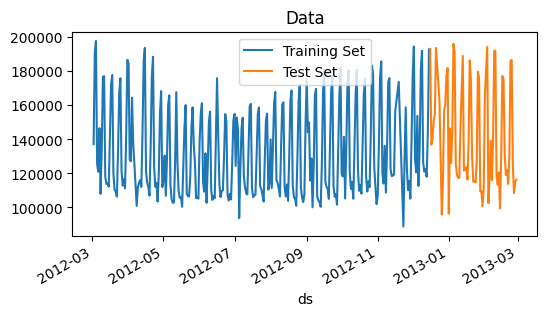

In [11]:
fig, ax = plt.subplots(figsize=(6, 3))
train.plot(x='ds', ax=ax, title="Data", label="Train")
test.plot(x='ds', ax=ax, title="Data", label="Test")    
ax.legend(['Training Set', 'Test Set'])

plt.show()

### Prophet

13:45:15 - cmdstanpy - INFO - Chain [1] start processing
13:45:15 - cmdstanpy - INFO - Chain [1] done processing


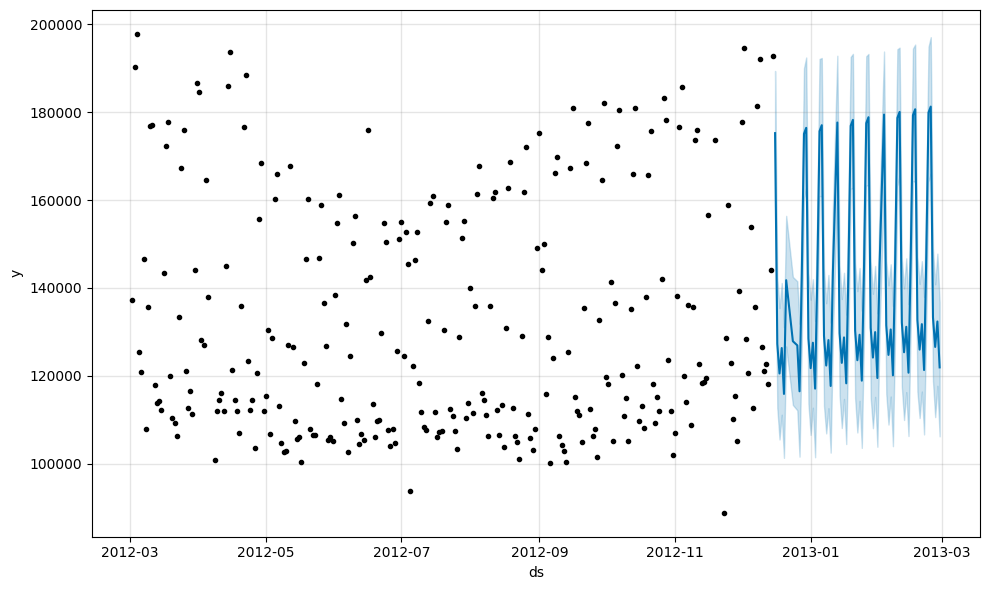

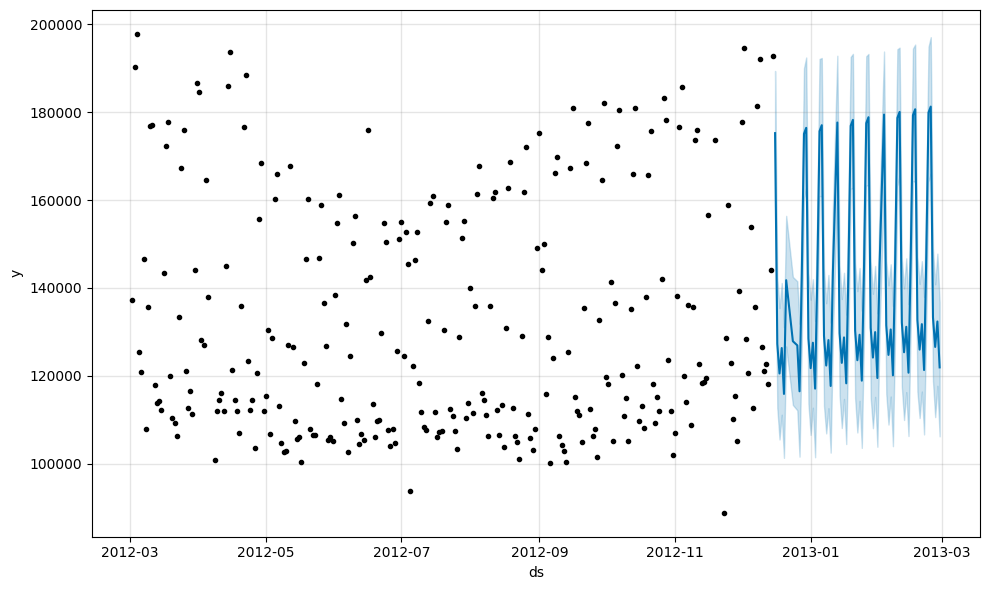

In [12]:
model = Prophet()
model.fit(train)

prophet_forecast = model.predict(test)
model.plot(prophet_forecast)

### Neural Prophet

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - /Users/mikkelendresen/Desktop/COMP/Projects/snowpark/myenv/lib/python3.11/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 98.582% of the data.
WARNING - (py.warnings._showwarnmsg) - /Users/mikkelendresen/Desktop/COMP/Projects/snowpark/myenv/lib/python3.11/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - /Users/mikk

Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (18) is too small than the required number                     for the learning rate finder (214). The results might not be optimal.
WARNING - (py.warnings._showwarnmsg) - /Users/mikkelendresen/Desktop/COMP/Projects/snowpark/myenv/lib/python3.11/site-packages/pytorch_lightning/utilities/data.py:78: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 16. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.

WARNING - (py.warnings._showwarnmsg) - /Users/mikkelendresen/Desktop/COMP/Projects/snowpark/myenv/lib/python3.11/site-packages/pytorch_lightning/utilities/data.py:78: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 10. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.

Finding best initial lr: 100%|██████████| 214/214 [00:03<00:00, 56.37it/s]


Training: |          | 0/? [01:06<?, ?it/s, v_num=0, train_loss=0.0178, reg_loss=0.000, MAE=7.25e+3, RMSE=1.07e+4, Loss=0.0174, RegLoss=0.000]

WARNING - (py.warnings._showwarnmsg) - /Users/mikkelendresen/Desktop/COMP/Projects/snowpark/myenv/lib/python3.11/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 92.857% of the data.
WARNING - (py.warnings._showwarnmsg) - /Users/mikkelendresen/Desktop/COMP/Projects/snowpark/myenv/lib/python3.11/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - /Users/mikkelendresen/Desktop/COMP/Projects/snowpark/myenv/lib/python3.11/site-packages/neuralprophet/df_utils.py:1152: FutureWarning


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 13.97it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - /Users/mikkelendresen/Desktop/COMP/Projects/snowpark/myenv/lib/python3.11/site-packages/neuralprophet/plot_forecast_plotly.py:100: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ds = fcst["ds"].dt.to_pydatetime()



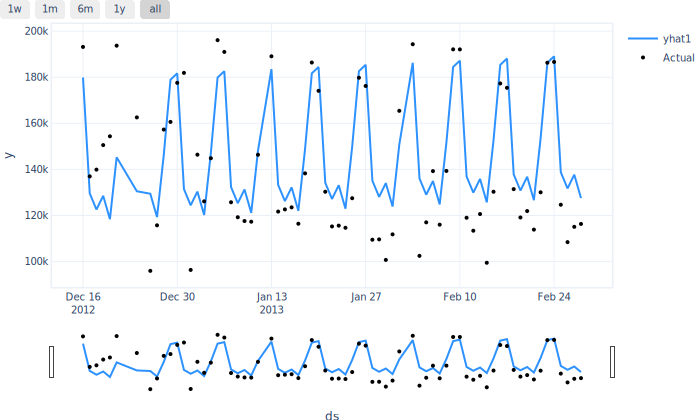

In [15]:

m = NeuralProphet()
m.set_plotting_backend("plotly-static")  # show plots correctly in jupyter notebooks
metrics = m.fit(train, freq='D')

nn_prophet_forecast = m.predict(test)

m.plot(nn_prophet_forecast)

### Comparison

Comparing prophet and neural prophet:
- Prophet time to train + predict = 0.4s
- Neural Prophet time to train + perdict = 1m 15.9s
- Prophet MAPE: 9.37%
- Neural Prophet MAPE: 10.94%

In [16]:
prophet_mape = mape(test['y'], prophet_forecast['yhat'])
print(f'Prophet MAPE: {prophet_mape}%')


nn_prophet_mape = mape(test['y'], nn_prophet_forecast['yhat1'])
print(f'Neural Prophet MAPE: {nn_prophet_mape}%')

Prophet MAPE: 9.37%
Neural Prophet MAPE: 10.94%


## Changepoint data

### Data Setup

In [17]:
session = create_session()

df = session.table("company_revenue_time_series_2") # without cutoff
df = df.to_pandas()

df = df.rename(columns={'DATE': 'ds', 'REVENUE': 'y'})
df = df[['ds', 'y']] # drop everything but these two if there are any

df['ds'] = pd.to_datetime(df['ds'])
df = df.sort_values(by='ds')
df = df.reset_index(drop=True)

print(df.head())
print('-'*60)
print(df.info())

# train / test split
cutoff = round(len(df) * 0.8)

train_80 = df[:cutoff]
test_80 = df[cutoff:]

          ds          y
0 2012-03-02  137233.99
1 2012-03-03  190247.55
2 2012-03-04  197809.12
3 2012-03-05  125417.64
4 2012-03-06  120953.92
------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      514 non-null    datetime64[ns]
 1   y       514 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 8.2 KB
None


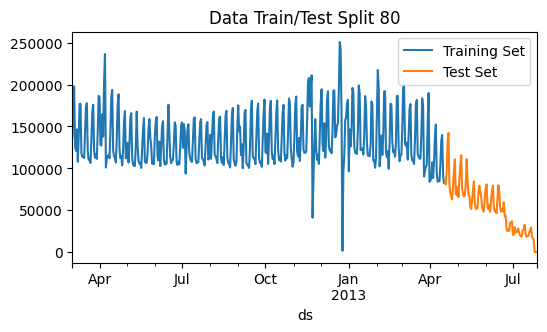

In [18]:
fig, ax = plt.subplots(figsize=(6, 3))
train_80.plot(x='ds', ax=ax, label='Training Set', title='Data Train/Test Split 80')
test_80.plot(x='ds', ax=ax, label='Test Set')
ax.legend(['Training Set', 'Test Set'])

plt.show()

## Prophet

Using the best model from previous experiments

13:57:05 - cmdstanpy - INFO - Chain [1] start processing
13:57:05 - cmdstanpy - INFO - Chain [1] done processing


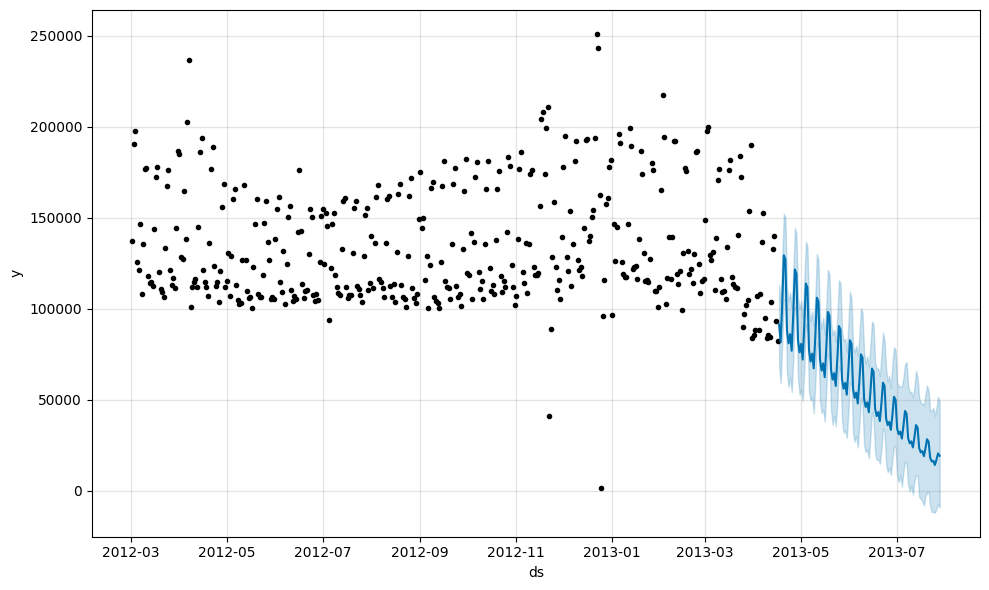

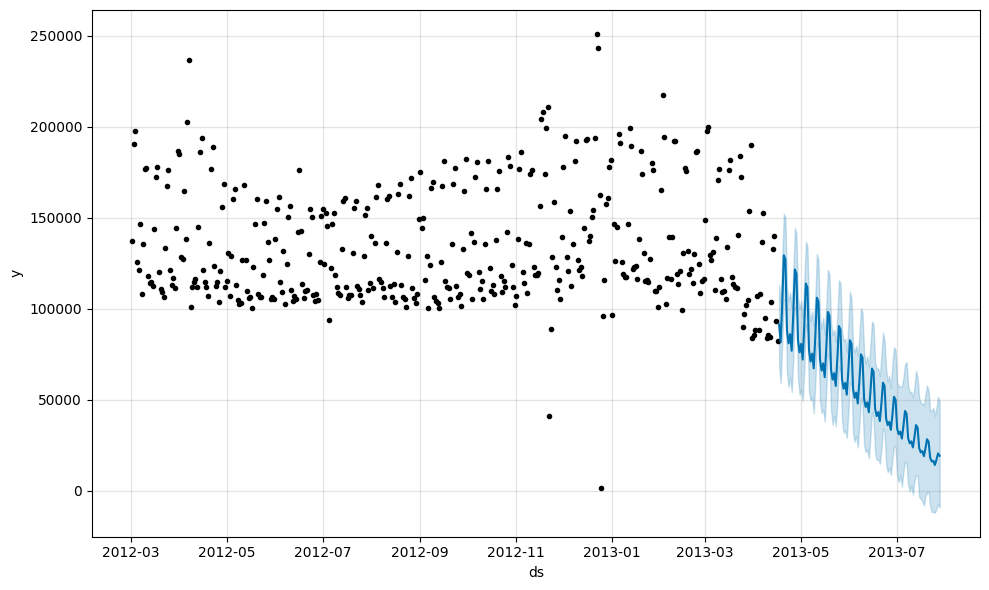

In [23]:
model = Prophet(
    growth = 'linear', 
    changepoints = ['2013-03-01'],
    weekly_seasonality = True,
    seasonality_mode='multiplicative',
    changepoint_prior_scale=1,
)
model.fit(train_80)

prophet_forecast = model.predict(test_80)
model.plot(prophet_forecast)

### Neural Prophet
Using same parameters as Prophet for now

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.


INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.757% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 150


Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (26) is too small than the required number                     for the learning rate finder (217). The results might not be optimal.
Finding best initial lr: 100%|██████████| 217/217 [00:05<00:00, 38.10it/s]


Training: |          | 0/? [01:15<?, ?it/s, v_num=2, train_loss=0.011, reg_loss=0.000, MAE=1.12e+4, RMSE=1.67e+4, Loss=0.011, RegLoss=0.000]  

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.029% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.029% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D



Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 20.49it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


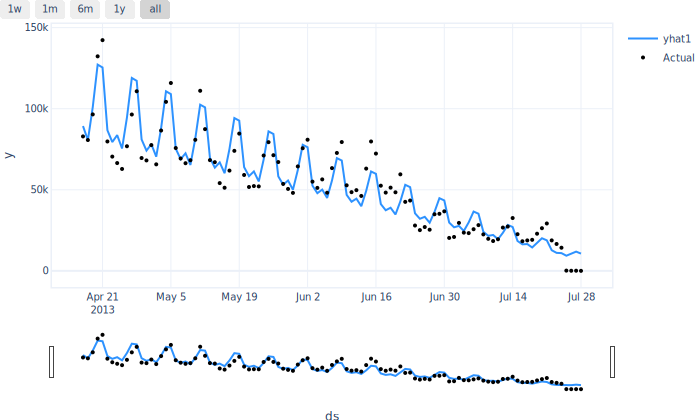

In [28]:

m = NeuralProphet(
    growth = 'linear', 
    changepoints = ['2013-03-01'],
    weekly_seasonality = True,
    seasonality_mode='multiplicative'
)

m.set_plotting_backend("plotly-static")  # show plots correctly in jupyter notebooks
metrics = m.fit(train_80, freq='D')

nn_prophet_forecast = m.predict(test_80)

m.plot(nn_prophet_forecast)

### Comparison


Comparing prophet and neural prophet:
- Prophet time to train + predict = 0.4s
- Neural Prophet time to train + perdict = 1m 22.2s
- Prophet MAPE: 2193.88%
- Neural Prophet MAPE: 1256.73%

In [31]:
prophet_mape = mape(test_80['y'], prophet_forecast['yhat'])
print(f'Prophet MAPE: {prophet_mape}%')

nn_prophet_mape = mape(test_80['y'], nn_prophet_forecast['yhat1'])
print(f'Neural Prophet MAPE: {nn_prophet_mape}%')

Prophet MAPE: 2193.88%
Neural Prophet MAPE: 1256.73%
